In [1]:
from sklearn.datasets import fetch_lfw_people
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection  import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics

from sklearn.model_selection  import GridSearchCV
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

### 1. 데이터 준비

이미지 데이터 fetch_lfw_people을 사용한다. 

각 이미지는 [62x47] 크기로 거의 3000개의 픽셀을 가진다. 

데이터의 일부를 시각화 한 결과는 아래와 같다.

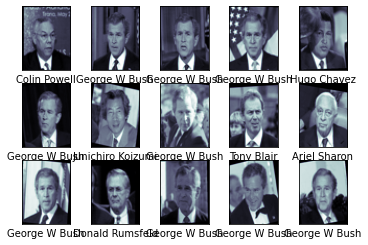

In [2]:
faces = fetch_lfw_people(min_faces_per_person=60)

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [12]:
faces.data.shape

(1348, 2914)

In [15]:
faces.images.shape

(1348, 62, 47)

In [16]:
faces.target.shape

(1348,)

In [17]:
faces.target_names.shape

(8,)

분류기 성능을 평가하기 위해 데이터를 train data와 test data로 분할한다.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.3,random_state=109) # 70% training and 30% test

### 2. 실험 진행

✅ **실험은 총 6가지 세팅으로 진행한다** ✅


✔ 원본 데이터에 서로 다른 3가지 kernel 함수를 적용한 모델과 원본 데이터에 PCA를 적용하여 차원을 축소한 뒤 3가지 kernel 함수를 적용한 모델 


✔  각 모델은 그리드 서치 cross-validation을 사용하여 최적의 매개변수 조합을 탐색

    (매개변수는 margin hardness를 조절하는 C와 RBF kernel의 사이즈를 조절하는 gamma로 설정)



#### 1. Linear Kernel SVC 사용


In [5]:
svc = SVC(kernel='linear', class_weight='balanced')
model = make_pipeline(svc) 

'''파라미터 튜닝'''
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid) # (학습시킬 모델, 파라미터 후보들)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

'''X_test로 예측'''
model = grid.best_estimator_
y_pred = model.predict(X_test)

'''분류 성능 지표로 평가'''
print(classification_report(y_test, y_pred,
                            target_names=faces.target_names))

CPU times: total: 51 s
Wall time: 51.1 s
{'svc__C': 1, 'svc__gamma': 0.0001}
                   precision    recall  f1-score   support

     Ariel Sharon       0.73      0.65      0.69        17
     Colin Powell       0.76      0.83      0.79        71
  Donald Rumsfeld       0.56      0.60      0.58        25
    George W Bush       0.88      0.92      0.90       176
Gerhard Schroeder       0.69      0.69      0.69        32
      Hugo Chavez       0.60      0.43      0.50        21
Junichiro Koizumi       0.94      0.77      0.85        22
       Tony Blair       0.86      0.76      0.81        41

         accuracy                           0.80       405
        macro avg       0.75      0.71      0.72       405
     weighted avg       0.80      0.80      0.80       405



#### 2. Polynomial Kernel SVC 사용

In [6]:
svc = SVC(kernel='poly', class_weight='balanced')
model = make_pipeline(svc) 

'''파라미터 튜닝'''
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid) # (학습시킬 모델, 파라미터 후보들)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

'''X_test로 예측'''
model = grid.best_estimator_
y_pred = model.predict(X_test)

'''분류 성능 지표로 평가'''
print(classification_report(y_test, y_pred,
                            target_names=faces.target_names))

CPU times: total: 1min 10s
Wall time: 1min 10s
{'svc__C': 50, 'svc__gamma': 0.001}
                   precision    recall  f1-score   support

     Ariel Sharon       0.60      0.53      0.56        17
     Colin Powell       0.73      0.82      0.77        71
  Donald Rumsfeld       0.50      0.52      0.51        25
    George W Bush       0.82      0.88      0.85       176
Gerhard Schroeder       0.72      0.72      0.72        32
      Hugo Chavez       0.60      0.43      0.50        21
Junichiro Koizumi       0.94      0.77      0.85        22
       Tony Blair       0.76      0.61      0.68        41

         accuracy                           0.76       405
        macro avg       0.71      0.66      0.68       405
     weighted avg       0.76      0.76      0.76       405



#### 3. RBF Kernel SVC 사용

In [7]:
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(svc) 

'''파라미터 튜닝'''
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid) # (학습시킬 모델, 파라미터 후보들)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

'''X_test로 예측'''
model = grid.best_estimator_
y_pred = model.predict(X_test)

'''분류 성능 지표로 평가'''
print(classification_report(y_test, y_pred,
                            target_names=faces.target_names))

CPU times: total: 1min 23s
Wall time: 1min 23s
{'svc__C': 50, 'svc__gamma': 0.001}
                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.59      0.62        17
     Colin Powell       0.77      0.87      0.82        71
  Donald Rumsfeld       0.73      0.64      0.68        25
    George W Bush       0.88      0.94      0.91       176
Gerhard Schroeder       0.77      0.75      0.76        32
      Hugo Chavez       0.67      0.48      0.56        21
Junichiro Koizumi       0.95      0.82      0.88        22
       Tony Blair       0.80      0.68      0.74        41

         accuracy                           0.82       405
        macro avg       0.78      0.72      0.75       405
     weighted avg       0.82      0.82      0.82       405



#### 4. PCA와 Linear Kernel SVC 사용

In [8]:
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='linear', class_weight='balanced')
model = make_pipeline(svc) 

'''파라미터 튜닝'''
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid) # (학습시킬 모델, 파라미터 후보들)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

'''X_test로 예측'''
model = grid.best_estimator_
y_pred = model.predict(X_test)

'''분류 성능 지표로 평가'''
print(classification_report(y_test, y_pred,
                            target_names=faces.target_names))

CPU times: total: 52.8 s
Wall time: 52.9 s
{'svc__C': 1, 'svc__gamma': 0.0001}
                   precision    recall  f1-score   support

     Ariel Sharon       0.73      0.65      0.69        17
     Colin Powell       0.76      0.83      0.79        71
  Donald Rumsfeld       0.56      0.60      0.58        25
    George W Bush       0.88      0.92      0.90       176
Gerhard Schroeder       0.69      0.69      0.69        32
      Hugo Chavez       0.60      0.43      0.50        21
Junichiro Koizumi       0.94      0.77      0.85        22
       Tony Blair       0.86      0.76      0.81        41

         accuracy                           0.80       405
        macro avg       0.75      0.71      0.72       405
     weighted avg       0.80      0.80      0.80       405



#### 5. PCA와 Polynomial Kernel SVC 사용

In [9]:
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='poly', class_weight='balanced')
model = make_pipeline(svc) 

'''파라미터 튜닝'''
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid) # (학습시킬 모델, 파라미터 후보들)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

'''X_test로 예측'''
model = grid.best_estimator_
y_pred = model.predict(X_test)

'''분류 성능 지표로 평가'''
print(classification_report(y_test, y_pred,
                            target_names=faces.target_names))

CPU times: total: 1min 13s
Wall time: 1min 13s
{'svc__C': 50, 'svc__gamma': 0.001}
                   precision    recall  f1-score   support

     Ariel Sharon       0.60      0.53      0.56        17
     Colin Powell       0.73      0.82      0.77        71
  Donald Rumsfeld       0.50      0.52      0.51        25
    George W Bush       0.82      0.88      0.85       176
Gerhard Schroeder       0.72      0.72      0.72        32
      Hugo Chavez       0.60      0.43      0.50        21
Junichiro Koizumi       0.94      0.77      0.85        22
       Tony Blair       0.76      0.61      0.68        41

         accuracy                           0.76       405
        macro avg       0.71      0.66      0.68       405
     weighted avg       0.76      0.76      0.76       405



#### 6. PCA와 RBF Kernel SVC 사용

In [10]:
pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(svc) 

'''파라미터 튜닝'''
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid) # (학습시킬 모델, 파라미터 후보들)

%time grid.fit(X_train, y_train)
print(grid.best_params_)

'''X_test로 예측'''
model = grid.best_estimator_
y_pred = model.predict(X_test)

'''분류 성능 지표로 평가'''
print(classification_report(y_test, y_pred,
                            target_names=faces.target_names))

CPU times: total: 1min 16s
Wall time: 1min 16s
{'svc__C': 50, 'svc__gamma': 0.001}
                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.59      0.62        17
     Colin Powell       0.77      0.87      0.82        71
  Donald Rumsfeld       0.73      0.64      0.68        25
    George W Bush       0.88      0.94      0.91       176
Gerhard Schroeder       0.77      0.75      0.76        32
      Hugo Chavez       0.67      0.48      0.56        21
Junichiro Koizumi       0.95      0.82      0.88        22
       Tony Blair       0.80      0.68      0.74        41

         accuracy                           0.82       405
        macro avg       0.78      0.72      0.75       405
     weighted avg       0.82      0.82      0.82       405

